In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [61]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [114]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.710807,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,3
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1


In [35]:
stroke_data.shape

(5110, 12)

In [113]:
stroke_data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
target               0
dtype: int64

# K-Means Clustering for Imputation

In [62]:
training_data = stroke_data.drop(["bmi", "stroke", "id"], axis=1)

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
training_data[["gender"]] = training_data[["gender"]].apply(le.fit_transform)
training_data[["ever_married"]] = training_data[["ever_married"]].apply(le.fit_transform)
training_data[["work_type"]] = training_data[["work_type"]].apply(le.fit_transform)
training_data[["Residence_type"]] = training_data[["Residence_type"]].apply(le.fit_transform)
training_data[["smoking_status"]] = training_data[["smoking_status"]].apply(le.fit_transform)

In [64]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)

In [65]:
km.fit(training_data)

KMeans(n_clusters=5)

In [26]:
km.labels_

array([1, 1, 3, ..., 2, 1, 0], dtype=int32)

In [27]:
km.cluster_centers_

array([[3.95596052e-01, 5.91860289e+01, 1.26803341e-01, 6.90964313e-02,
        9.09643128e-01, 1.89597570e+00, 5.14047077e-01, 7.51724829e+01,
        1.52619590e+00],
       [4.75000000e-01, 6.04875000e+01, 2.57812500e-01, 1.60937500e-01,
        8.85937500e-01, 1.97031250e+00, 5.14062500e-01, 2.10341359e+02,
        1.57968750e+00],
       [4.02230971e-01, 2.09310761e+01, 1.57480315e-02, 6.56167979e-04,
        3.01181102e-01, 2.52099738e+00, 5.19685039e-01, 8.04562730e+01,
        1.12729659e+00],
       [4.02378593e-01, 5.79187314e+01, 1.26858276e-01, 7.82953419e-02,
        9.13776016e-01, 1.88206145e+00, 4.96531219e-01, 1.07474658e+02,
        1.57284440e+00],
       [4.40322581e-01, 2.24016774e+01, 2.25806452e-02, 3.22580645e-03,
        3.33870968e-01, 2.54516129e+00, 4.79032258e-01, 1.25381790e+02,
        1.14516129e+00]])

In [66]:
stroke_data["target"] = km.predict(training_data)

In [72]:
X = stroke_data.dropna()[["target"]]
y = stroke_data.dropna()[["bmi"]]

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X,y)

LinearRegression()

In [106]:
test_data = stroke_data[stroke_data.isnull().any(axis=1)][["target"]]

In [107]:
pred = lr.predict(test_data)

In [112]:
stroke_data.loc[stroke_data.isnull().any(axis=1),"bmi"] = pred

In [6]:
#from sklearn.impute import KNNImputer

#kn = KNNImputer()

#stroke_data[['bmi']] = kn.fit_transform(stroke_data[['bmi']])

In [115]:
stroke_data_cat = stroke_data.select_dtypes(object)
stroke_data_num = stroke_data.select_dtypes(np.number)

In [116]:
stroke_data_cat.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [117]:
stroke_data_num.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,target
0,9046,67.0,0,1,228.69,36.600000,1,1
1,51676,61.0,0,0,202.21,28.710807,1,1
2,31112,80.0,0,1,105.92,32.500000,1,3
3,60182,49.0,0,0,171.23,34.400000,1,1
4,1665,79.0,1,0,174.12,24.000000,1,1


<AxesSubplot:ylabel='Frequency'>

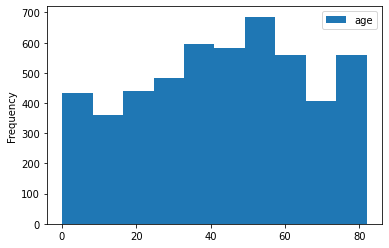

In [118]:
stroke_data_num[['age']].plot.hist()

In [13]:
stroke_data_num[['age']] = pd.cut(stroke_data_num['age'], bins=[0,35,60,100], labels=['Youth', 'Mid_Age', "Old_Age"])

/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ag78400/opt/anaconda3/envs/AI_for_Healthcare/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:ylabel='Frequency'>

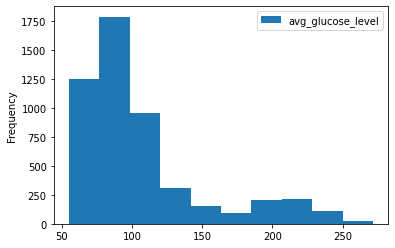

In [119]:
stroke_data_num[['avg_glucose_level']].plot.hist()

In [120]:
stroke_data_num[['avg_glucose_level']] = pd.cut(stroke_data_num['avg_glucose_level'], bins=[0, 100, 160, 220, 300], labels=['Low_Glucose', 'Non_Diabetic', "High_Glucose", "Diabetic"])

<AxesSubplot:ylabel='Frequency'>

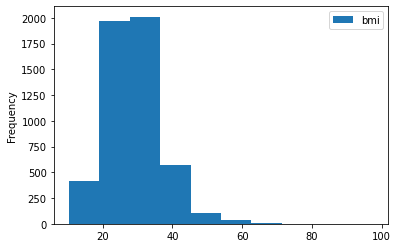

In [16]:
stroke_data_num[['bmi']].plot.hist()

In [121]:
stroke_data_num[['bmi']] = pd.cut(stroke_data_num['bmi'], bins=[0, 18.5, 25, 30, 100], labels=['Underweight', 'Healthy', "Overweight", "Obese"])

In [122]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [123]:
stroke_data_num[['bmi']] = stroke_data_num[['bmi']].apply(le.fit_transform)
stroke_data_num[['avg_glucose_level']] = stroke_data_num[['avg_glucose_level']].apply(le.fit_transform)
stroke_data_num[['age']] = stroke_data_num[['age']].apply(le.fit_transform)

In [124]:
stroke_data_cat = stroke_data_cat.apply(le.fit_transform)

In [125]:
stroke_data_final = pd.concat([stroke_data_num, stroke_data_cat], axis=1)
stroke_data_final.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,target,gender,ever_married,work_type,Residence_type,smoking_status
0,9046,88,0,1,0,1,1,1,1,1,2,1,1
1,51676,82,0,0,1,2,1,1,0,1,3,0,2
2,31112,101,0,1,3,1,1,3,1,1,2,0,2
3,60182,70,0,0,1,1,1,1,0,1,2,1,3
4,1665,100,1,0,1,0,1,1,0,1,3,0,2


In [126]:
X = stroke_data_final.drop(['id', 'stroke'], axis=1)
y = stroke_data_final[['stroke']]

In [127]:
y.value_counts()

stroke
0         4861
1          249
dtype: int64

In [128]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [129]:
len(x_train), len(x_test), len(y_train), len(y_test)

(3577, 1533, 3577, 1533)

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=1000)

In [132]:
lr.fit(x_train, y_train)

LogisticRegression()

In [133]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [134]:
pred = rf.predict(x_test)

In [135]:
pred2 = lr.predict(x_test)

In [136]:
from sklearn.metrics import PrecisionRecallDisplay, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [137]:
ps = precision_score(y_test, pred)
rc = recall_score(y_test, pred)

print(ps,rc)

0.11764705882352941 0.02666666666666667


In [138]:
ps = precision_score(y_test, pred2)
rc = recall_score(y_test, pred2)

print(ps,rc)

0.0 0.0


In [31]:
confusion_matrix(y_test, pred)

array([[1434,   24],
       [  71,    4]])

In [32]:
accuracy_score(y_test, pred)

0.9380300065231572

In [139]:
from sklearn.neighbors import KNeighborsClassifier

knn_c = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='auto', 
                             leaf_size=1, p=2, metric='minkowski', metric_params=None, 
                             n_jobs=None)

In [140]:
knn_c.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=6, weights='distance')

In [141]:
pred = knn_c.predict(x_test)

In [142]:
ps = precision_score(y_test, pred)
rc = recall_score(y_test, pred)

print(ps,rc)

0.0625 0.013333333333333334


In [143]:
accuracy_score(y_test, pred)

0.9419439008480104

In [38]:
confusion_matrix(y_test, pred)

array([[1437,   21],
       [  72,    3]])

In [144]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

gnb = GaussianNB()

In [145]:
gnb.fit(x_train, y_train)

GaussianNB()

In [147]:
pred1 = gnb.predict(x_test)

In [148]:
ps = precision_score(y_test, pred1)
rc = recall_score(y_test, pred1)

print(ps,rc)

0.1935483870967742 0.48


In [46]:
pred1 = np.where(gnb.predict_proba(x_test)[:, 1]<0.2, 0, 1)
ps = precision_score(y_test, pred1)
rc = recall_score(y_test, pred1)

print(ps,rc)

0.1506276150627615 0.48


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.810


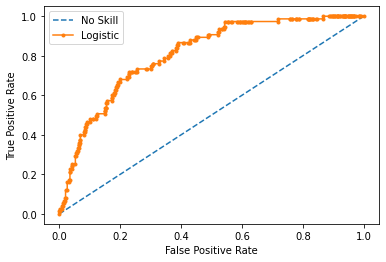

In [149]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = gnb.predict_proba(x_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the y_test
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [150]:
from sklearn.svm import LinearSVC, SVC

In [151]:
lsvc = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, 
                 multi_class='ovr', fit_intercept=True, intercept_scaling=1, 
                 class_weight=None, verbose=0, random_state=None, max_iter=1000)
lsvc.fit(x_train, y_train)
pred = lsvc.predict(x_test)

ps = precision_score(y_test, pred)
rc = recall_score(y_test, pred)

print("Precision: ", ps,"\n Recall:  ", rc)

Precision:  0.0 
 Recall:   0.0


In [152]:
svc = SVC(C=0.000001, kernel='rbf', degree=10, gamma='auto', 
                 coef0=0.0, shrinking=False, probability=True, 
                 tol=1, cache_size=1, class_weight=None, 
                 verbose=False, max_iter=10000, 
                 decision_function_shape='ovo', break_ties=False, 
                 random_state=None)
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

ps = precision_score(y_test, pred)
rc = recall_score(y_test, pred)

print("Precision: ", ps,"\n Recall:  ", rc)

Precision:  0.0 
 Recall:   0.0


# Parameter Tuning

In [162]:
tuned_parameters_rf = [{'criterion': ['gini', 'entropy'], 
                     'n_estimators': [100, 500, 1000, 5000],
                     'max_features': ['sqrt', 'log2'],
                    'class_weight': ["balanced", "balanced_subsample"]}]

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters_rf, cv=5,
                       scoring='%s_macro' % score, n_jobs=-1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



KeyboardInterrupt: 

In [153]:
from sklearn.ensemble import VotingClassifier

vt = VotingClassifier([("Non Linear SVC", rf),
                      ("Naive Bayes", gnb)], voting="soft")

vt.fit(x_train, y_train)
pred = vt.predict(x_test)
ps = precision_score(y_test, pred)
rc = recall_score(y_test, pred)

print("Precision: ", ps,"\n Recall:  ", rc)

Precision:  0.22413793103448276 
 Recall:   0.3466666666666667


In [154]:
from sklearn.model_selection import KFold, StratifiedKFold

In [158]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#X = X.to_numpy()
#y = y.to_numpy()

precision_scores = []
recall_scores = []
predictions = []
data_y = []
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    precision_scores.append(
        precision_score(vt.fit(X_train, y_train).predict(X_test), y_test)
    )
    recall_scores.append(
        recall_score(vt.fit(X_train, y_train).predict(X_test), y_test)
    )
    
    data_y.extend(y_test)
    predictions.extend(vt.predict_proba(X_test)[:,1])
print("Precision Score:  ", np.mean(precision_scores), "\n\nRecall Score:  ", np.mean(recall_scores))

Precision Score:   0.2692244897959184 

Recall Score:   0.1672354064375341


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.812


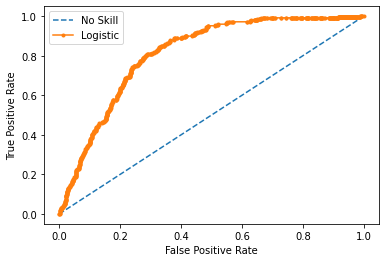

In [159]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(data_y))]

# predict probabilities
lr_probs = predictions

# keep probabilities for the positive outcome only
lr_probs = lr_probs

# calculate scores
ns_auc = roc_auc_score(data_y, ns_probs)
lr_auc = roc_auc_score(data_y, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(data_y, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(data_y, predictions)

# plot the roc curve for the y_test
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [165]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [179]:
# define the pipeline
steps = [('pca', PCA(n_components=0.8)), ('m', rf)]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.106 (0.026)


In [248]:
pc = PCA(n_components=0.99,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None)

In [249]:
pc.fit(X)

PCA(n_components=0.99)

In [250]:
pc.components_

array([[-9.99492560e-01, -3.51739076e-03, -2.55080950e-03,
         7.04790737e-03,  7.22923865e-04, -1.68213370e-02,
         6.54949388e-04, -1.39609767e-02,  1.75213585e-02,
        -2.91059231e-04, -1.26558240e-02],
       [-1.31788998e-02, -1.15976087e-02, -7.86161721e-03,
         3.56245886e-01,  2.07173930e-03,  9.33939175e-01,
         1.86196656e-03,  1.49173604e-02,  2.21491242e-03,
        -1.16809691e-02, -1.02398766e-02]])

In [251]:
pc.explained_variance_ratio_

array([0.9891244, 0.0036873])

In [252]:
data_transformed = pc.transform(X)

In [253]:
pc_df_X = pd.DataFrame(data = data_transformed)

In [254]:
pc_df_X.describe()

,0,1
count,5.110000e+03,5.110000e+03
mean,-5.339499e-15,-1.185397e-16
std,2.309567e+01,1.410131e+00
min,-3.904215e+01,-1.946909e+00
25%,-1.799158e+01,-1.311745e+00
50%,-2.000860e+00,-6.996733e-02
75%,1.798973e+01,1.096232e+00
max,6.406307e+01,3.307795e+00


In [255]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
pc_df_X = pc_df_X.to_numpy()
#y = y.to_numpy()

precision_scores = []
recall_scores = []
predictions = []
data_y = []
for train_index, test_index in kf.split(pc_df_X, y):
    X_train, X_test = pc_df_X[train_index], pc_df_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    precision_scores.append(
        precision_score(vt.fit(X_train, y_train).predict(X_test), y_test)
    )
    recall_scores.append(
        recall_score(vt.fit(X_train, y_train).predict(X_test), y_test)
    )
    
    data_y.extend(y_test)
    predictions.extend(vt.predict_proba(X_test)[:,1])
print("Precision Score:  ", np.mean(precision_scores), "\n\nRecall Score:  ", np.mean(recall_scores))

Precision Score:   0.0 

Recall Score:   0.0
